In [ ]:
import tensorflow as tf

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt, matplotlib.image as mpimg
import time 
import warnings
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

%matplotlib inline
warnings.filterwarnings('ignore')

2022-12-09 16:19:34.240811: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 16:19:34.566647: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-09 16:19:34.566683: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-09 16:19:34.659265: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-09 16:19:38.488422: W tensorflow/stream_executor/pla

In [ ]:
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [ ]:
def threed_to_twod(data):
    return data.reshape(data.shape[0], data.shape[1]*data.shape[2])

In [ ]:
#Converting form 3D to 2D
X_train = threed_to_twod(X_train)
X_test = threed_to_twod(X_test)

In [ ]:
len(X_train[0])

784

In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
# #Converting 1D array to 2D 28x28 array using reshape , to plot and view grayscale images.
# for x in range(0,4):
#     train_0=data[label==x]
#     data_new=[]
#     for idx in train_0.index:
#         val=train_0.loc[idx].values.reshape(28,28)
#         data_new.append(val)
#     plt.figure(figsize=(25,25))   
#     for x in range(1,5):
#         ax1=plt.subplot(1, 20, x)
#         ax1.imshow(data_new[x],cmap='gray')


Text(0, 0.5, 'Frequency')

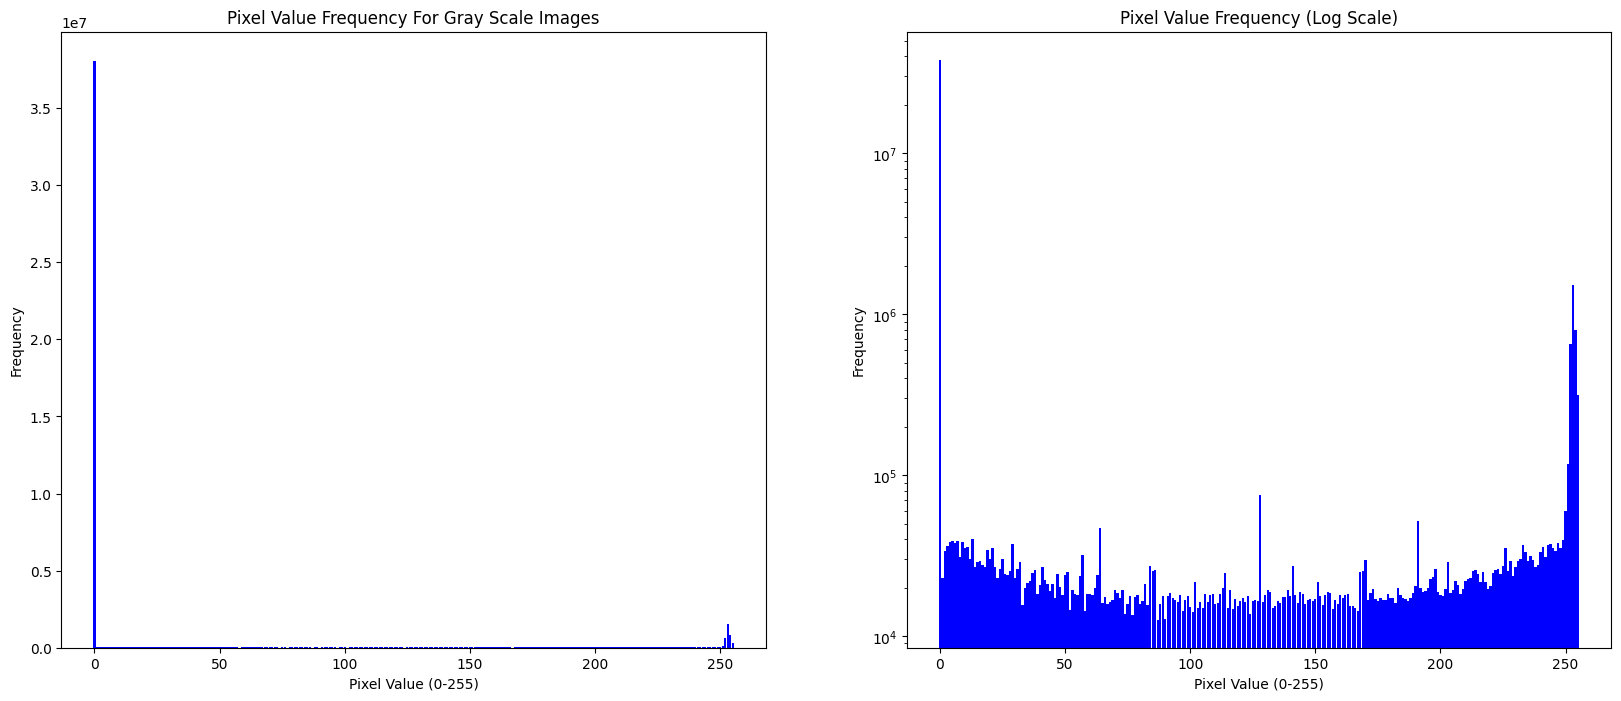

In [ ]:
#To get a better idea, lets convert the plot to Log Scale.
#Based on leading 0s and 255s we can try converting it to binary in the later steps to simplify the problem.

y = pd.value_counts(X_train.ravel()).sort_index()
N = len(y)
x = range(N)
width =0.9
plt.figure(figsize=[20,8])
ax1=plt.subplot(1, 2,1)
ax1.bar(x, y, width, color="blue")
plt.title('Pixel Value Frequency For Gray Scale Images')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')
#ax1.imshow(data_new[x],cmap='gray')
ax2=plt.subplot(1, 2,2)
ax2.bar(x, y, width, color="blue")
plt.title('Pixel Value Frequency (Log Scale)')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')
#plt.yscale('')

In [ ]:
# Training it on a sample
#You can change the value i to use the desired number of samples.
i=5000;
score=[]
fittime=[]
scoretime=[]
clf = svm.SVC(random_state=42)

In [ ]:
print("Default Parameters are: \n",clf.get_params)

Default Parameters are: 
 <bound method BaseEstimator.get_params of SVC(random_state=42)>


In [ ]:
start_time = time.time()
clf.fit(X_train[:i], y_train[:i])
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
start_time = time.time()
score=clf.score(X_test,y_test)
print("Accuracy for grayscale: ",score)
scoretime = time.time() - start_time
print("Time consumed to score: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case1=[score,fittime,scoretime]

Time consumed to fit model:  00:00:06
Accuracy for grayscale:  0.9513
Time consumed to score:  00:00:33


In [ ]:
# #Case 2 - Binary Images

# #To simply the problem, converting images to black and white from gray scale by replacing all values > 0 to 1.
# #And Converting 1D array to 2D 28x28 array using reshape , to plot and view binary images.
# X_test_b=X_test
# X_train_b=X_train
# X_test_b[X_test_b>0]=1
# X_train_b[X_train_b>0]=1
# for x in range(0,4):
#     train_0=X_train_b[y_train==x]
#     data_new=[]
#     for idx in :
#         val=train_0[idx].reshape(28,28)
#         data_new.append(val)
#     plt.figure(figsize=(25,25))   
#     for x in range(1,5):
#         ax1=plt.subplot(1, 20, x)
#         ax1.imshow(data_new[x],cmap='binary')

In [ ]:
#Case 2 - Binary Images

#To simply the problem, converting images to black and white from gray scale by replacing all values > 0 to 1.
#And Converting 1D array to 2D 28x28 array using reshape , to plot and view binary images.
X_test_b=X_test
X_train_b=X_train
X_test_b[X_test_b>0]=1
X_train_b[X_train_b>0]=1
# for x in range(0,4):
#     train_0=X_train_b[y_train==x]
#     data_new=[]
#     for idx in :
#         val=train_0[idx].reshape(28,28)
#         data_new.append(val)
#     plt.figure(figsize=(25,25))   
#     for x in range(1,5):
#         ax1=plt.subplot(1, 20, x)
#         ax1.imshow(data_new[x],cmap='binary')

In [ ]:
# for x in range(0,4):
#     train_0=X_train_b[y_train==x]
#     print(train_0.index)

In [ ]:
start_time = time.time()
clf.fit(X_train_b[:i], y_train[:i])
fititme = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
score=clf.score(X_test_b,y_test)
start_time = time.time()
clf.fit(X_train_b[:i], y_train[:i])
print("Accuracy for binary: ",score)
scoretime = time.time() - start_time
print("Time consumed to score: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case2=[score,fittime,scoretime]

Time consumed to fit model:  00:00:06
Accuracy for binary:  0.9469
Time consumed to score:  00:00:14


Case 3 - GrayScale + Dimensionality Reduction - PCA
It is a linear transformation technique used to identify strong patterns in data by finding out variable correlation. It maps the data to a lower dimensional subspace in a way that data variance is maximized while retaining most of the information.

To understand how PCA works, this tutorial may help - Principal Component Analysis Explained

We are using sklearnPCA library here to perform PCA Dimensionality Reduction.

Here, Data is standardized and PCA is performed on data with all the components. Then variance is plotted for all components to decide which components to remove.

## 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

#standardized data
sc = StandardScaler().fit(X_train)
X_std_train = sc.transform(X_train)
X_std_test = sc.transform(X_test)

#If n_components is not set then all components are stored 
sklearn_pca = sklearnPCA().fit(X_std_train)
train_pca = sklearn_pca.transform(X_std_train)
test_pca = sklearn_pca.transform(X_std_test)

#Percentage of variance explained by each of the selected components.
#If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
var_per = sklearn_pca.explained_variance_ratio_
cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(30,10))
ind = np.arange(len(var_per)) 
plt.bar(ind,var_per)
plt.xlabel('n_components')
plt.ylabel('Variance')

In [ ]:
n_comp=len(cum_var_per[cum_var_per <= 0.90])
print("Keeping 90% Info with ",n_comp," components")
sklearn_pca = sklearnPCA(n_components=n_comp)
train_pca = sklearn_pca.fit_transform(X_std_train)
test_pca = sklearn_pca.transform(X_std_test)
print("Shape before PCA for Train: ",X_std_train.shape)
print("Shape after PCA for Train: ",train_pca.shape)
print("Shape before PCA for Test: ",X_std_test.shape)
print("Shape after PCA for Test: ",test_pca.shape)

Keeping 90% Info with  301  components
Shape before PCA for Train:  (60000, 784)
Shape after PCA for Train:  (60000, 301)
Shape before PCA for Test:  (10000, 784)
Shape after PCA for Test:  (10000, 301)


In [ ]:
start_time = time.time()
clf.fit(train_pca[:i], y_train[:i])
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
start_time = time.time()
score=clf.score(test_pca,y_test)
print("Accuracy for grayscale: ",score)
scoretime = time.time() - start_time
print("Time consumed to score model: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case3=[score,fittime,scoretime]

Time consumed to fit model:  00:00:02
Accuracy for grayscale:  0.9298
Time consumed to score model:  00:00:09


Text(0, 0.5, 'Variance')

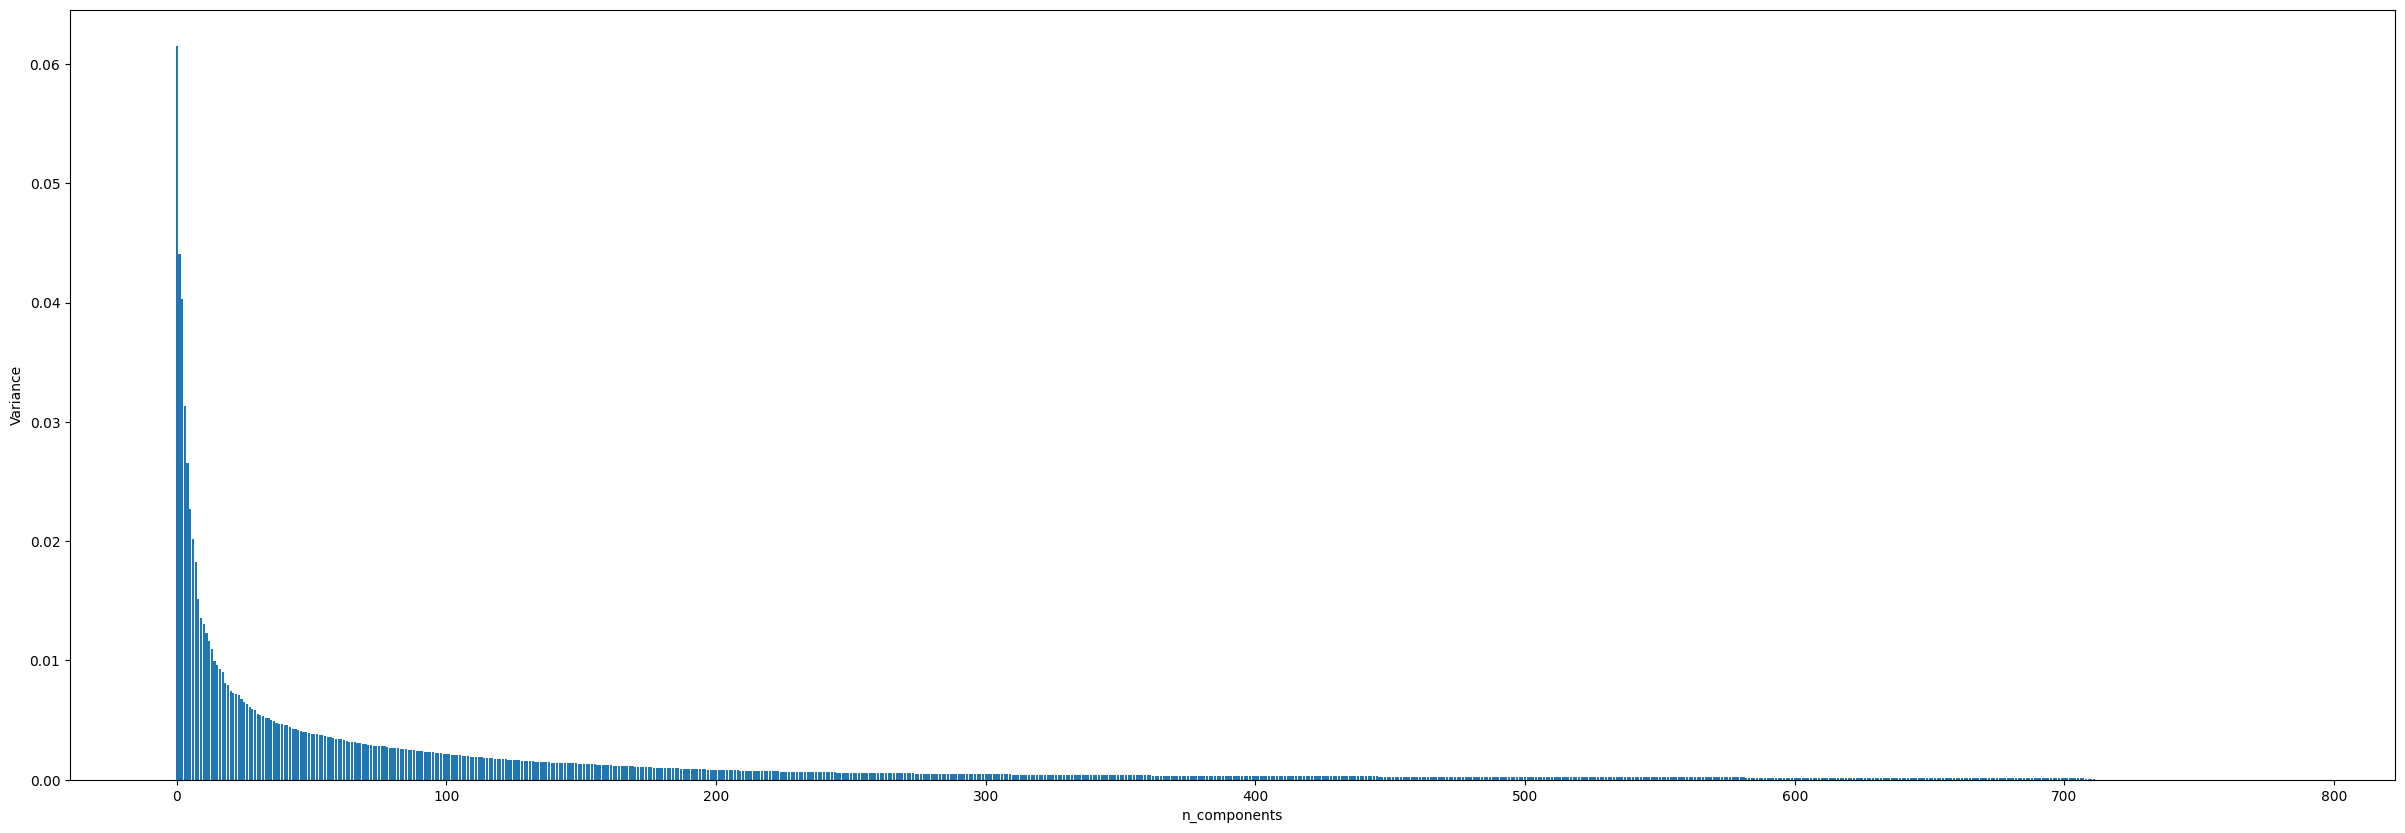

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

#standardized data
sc = StandardScaler().fit(X_train_b)
X_std_train = sc.transform(X_train_b)
X_std_test = sc.transform(X_test_b)

#If n_components is not set then all components are stored 
sklearn_pca = sklearnPCA().fit(X_std_train)
#train_pca_b = sklearn_pca.transform(X_std_train)
#test_pca_b = sklearn_pca.transform(X_std_test)

#Percentage of variance explained by each of the selected components.
#If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
var_per = sklearn_pca.explained_variance_ratio_
cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(30,10))
ind = np.arange(len(var_per)) 
plt.bar(ind,var_per)
plt.xlabel('n_components')
plt.ylabel('Variance')

In [ ]:
n_comp=len(cum_var_per[cum_var_per <= 0.90])
print("Keeping 90% Info with ",n_comp," components")
sklearn_pca = sklearnPCA(n_components=n_comp)
train_pca_b = sklearn_pca.fit_transform(X_std_train)
test_pca_b = sklearn_pca.transform(X_std_test)
print("Shape before PCA for Train: ",X_std_train.shape)
print("Shape after PCA for Train: ",train_pca_b.shape)
print("Shape before PCA for Test: ",X_std_test.shape)
print("Shape after PCA for Test: ",test_pca_b.shape)

Keeping 90% Info with  301  components
Shape before PCA for Train:  (60000, 784)
Shape after PCA for Train:  (60000, 301)
Shape before PCA for Test:  (10000, 784)
Shape after PCA for Test:  (10000, 301)


In [ ]:
start_time = time.time()
clf.fit(train_pca_b[:i], y_train[:i])
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
start_time = time.time()
score=clf.score(test_pca_b,y_test)
print("Accuracy for grayscale: ",score)
scoretime = time.time() - start_time
print("Time consumed to score model: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case4=[score,fittime,scoretime]

Time consumed to fit model:  00:00:02
Accuracy for grayscale:  0.9294
Time consumed to score model:  00:00:09


In [ ]:
head =["Accuracy","FittingTime","ScoringTime"]
print("\t\t case1 \t\t\t case2 \t\t\t case3 \t\t\t case4")
for h, c1, c2, c3, c4 in zip(head, case1, case2, case3, case4):
    print("{}\t{}\t{}\t{}\t{}".format(h, c1, c2, c3, c4))


		 case1 			 case2 			 case3 			 case4
Accuracy	0.9513	0.9469	0.9298	0.9294
FittingTime	3.3479771614074707	3.3479771614074707	2.2204315662384033	2.2827937602996826
ScoringTime	20.293742179870605	3.086379289627075	9.269810438156128	9.429250478744507


In [ ]:
from tqdm import tqdm

fit_time=[]
score=[]
score_time=[]
for j in tqdm(range(1000,60000,5000)):
    start_time = time.time()
    clf.fit(train_pca_b[:j], y_train[:j])
    fit_time.append(time.time() - start_time)
    start_time = time.time()
    score.append(clf.score(test_pca_b,y_test))
    score_time.append(time.time() - start_time)

100%|██████████| 12/12 [20:37<00:00, 103.09s/it]


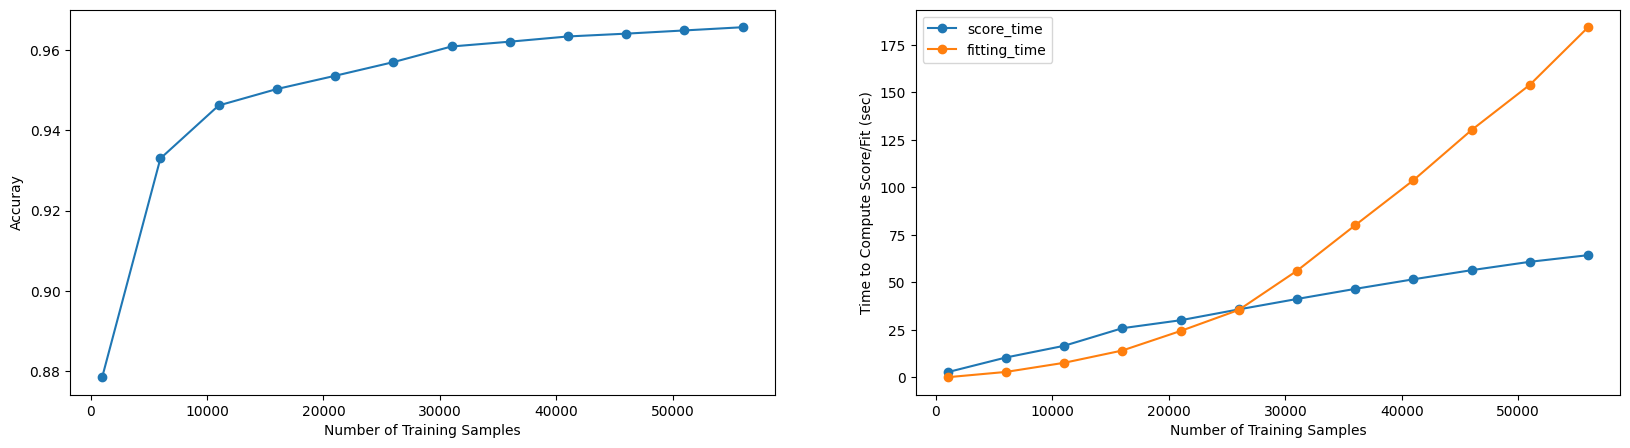

In [ ]:
x=list(range(1000,60000,5000))
plt.figure(figsize=[20,5]);
ax1=plt.subplot(1, 2,1)
ax1.plot(x,score,'-o');
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuray')
ax2=plt.subplot(1, 2,2)
ax2.plot(x,score_time,'-o');
ax2.plot(x,fit_time,'-o');
plt.xlabel('Number of Training Samples')
plt.ylabel('Time to Compute Score/Fit (sec)')
plt.legend(['score_time','fitting_time'])

In [ ]:
clf.get_params


<bound method BaseEstimator.get_params of SVC(random_state=42)>

In [ ]:
parameters = {'gamma': [1, 0.1, 0.01, 0.001,0.001],
             'C': [1000, 100, 10, 5,1],'kernel':['rbf','linear']} 

p = GridSearchCV(clf , param_grid=parameters, cv=3)

In [ ]:
X=train_pca_b[:i]
y=y_train[:i]
start_time = time.time()
p.fit(X,y)
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))


Time consumed to fit model:  00:06:32


In [ ]:
print("Scores for all Parameter Combination: \n",p.cv_results_['mean_test_score'])
print("\nOptimal C and Gamma Combination: ",p.best_params_)
print("\nMaximum Accuracy acheieved on LeftOut Data: ",p.best_score_)

Scores for all Parameter Combination: 
 [0.11260005 0.89520067 0.18020081 0.89520067 0.78659514 0.89520067
 0.92620119 0.89520067 0.92620119 0.89520067 0.11260005 0.89520067
 0.18020081 0.89520067 0.78659514 0.89520067 0.92620119 0.89520067
 0.92620119 0.89520067 0.11260005 0.89520067 0.18020081 0.89520067
 0.78659514 0.89520067 0.92880151 0.89520067 0.92880151 0.89520067
 0.11260005 0.89520067 0.18020081 0.89520067 0.78659514 0.89520067
 0.92740059 0.89520067 0.92740059 0.89520067 0.11260005 0.89520067
 0.17640061 0.89520067 0.77459478 0.89520067 0.91880051 0.89520067
 0.91880051 0.89520067]

Optimal C and Gamma Combination:  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Maximum Accuracy acheieved on LeftOut Data:  0.9288015146070426


In [ ]:
C=p.best_params_['C']
gamma=p.best_params_['gamma']
clf=svm.SVC(C=C,gamma=gamma,kernel='rbf' ,random_state=42)

In [ ]:
start_time = time.time()
clf.fit(train_pca_b[:i], y_train[:i])
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))
print("Accuracy for binary: ",clf.score(test_pca_b,y_test))

Time consumed to fit model:  00:00:01
Accuracy for binary:  0.9393


In [ ]:
start_time = time.time()
clf.fit(train_pca_b, y_train)
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))
start_time = time.time()
print("Accuracy for binary: ",clf.score(test_pca_b,y_test))
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

Time consumed to fit model:  00:02:26
Accuracy for binary:  0.9723
Time consumed to fit model:  00:00:56


In [ ]:
#KNN
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors = 5, algorithm = 'brute'))
start_time = time.time()
knn.fit(train_pca_b, y_train)
elapsed_time = time.time() - start_time
print("Time consumed to train model: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))


Time consumed to train model:  00:00:09


In [ ]:
start_time = time.time()
score=knn.score(test_pca_b,y_test)
print("Accuracy for grayscale: ",score)
scoretime = time.time() - start_time
print("Time consumed to score model: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case4=[score,fittime,scoretime]

Accuracy for grayscale:  0.9466
Time consumed to score model:  00:01:41


In [ ]:
#ANN
import annoy
from sklearn import metrics
def annoy_knn(Ntrees, Nsamples, X_train, y_train, X_test, y_test):
    start_time = time.time()
    
    vector_length = X_train.shape[1]
    t = annoy.AnnoyIndex(vector_length)
    for i, v in zip(range(Nsamples), X_train[:Nsamples]):
        t.add_item(i, v)
    t.build(Ntrees)

    elapsed_time = time.time() - start_time
    print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

    start_time = time.time()
    pred = [y_train[t.get_nns_by_vector(v, 1)[0]] for v in X_test]
    elapsed_time = time.time() - start_time
    print("Time consumed to test model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

    acc = metrics.accuracy_score(y_test, pred)
    return acc, pred


acc, pred = annoy_knn(10, 80000, train_pca_b, y_train, test_pca_b, y_test)

print('accuracy of ann: ', acc)

metrics.confusion_matrix(y_test, pred)

Time consumed to fit model:  00:00:03
Time consumed to test model:  00:00:00
accuracy of ann:  0.937


array([[ 967,    0,    0,    0,    2,    1,    7,    1,    2,    0],
       [   1, 1127,    3,    1,    0,    0,    2,    0,    0,    1],
       [  17,    7,  958,   13,    4,    0,    8,   10,   13,    2],
       [   1,    1,    7,  939,    1,   24,    1,   12,   18,    6],
       [   0,    9,    3,    1,  919,    0,   13,    4,    2,   31],
       [   5,    4,    2,   36,    6,  791,   15,    3,   22,    8],
       [  16,    5,    1,    1,    3,    6,  923,    0,    2,    1],
       [   1,   15,    9,    3,    8,    2,    1,  953,    0,   36],
       [  12,    5,   10,   22,   12,   27,    7,    9,  863,    7],
       [   7,    5,    5,    9,   13,    5,    0,   28,    7,  930]])

In [ ]:
!pip install --user annoy

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=62bfbc7a-56e8-416a-a6e5-2c8f44c699f4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>